In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import risk_mgm_lib as rml
from scipy.optimize import fsolve
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt

## Problem 1

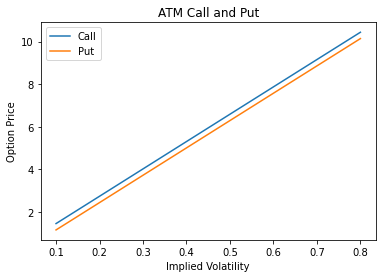

In [3]:
S = 165
X = 165 # Assuming ATM at first
cur_date = pd.to_datetime('2023-03-03')
exp = pd.to_datetime('2023-03-17')
r = 0.0525
q = 0.0053
b = r-q
T = (exp - cur_date).days / 365
sigma = np.linspace(0.1, 0.8, 100)

d1 = (np.log(S/X) + (b + sigma**2/2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

C = S*np.exp((b-r)*T)*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)
P = X*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp((b-r)*T)*norm.cdf(-d1)

plt.plot(sigma, C, label='Call')
plt.plot(sigma, P, label='Put')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Price')
plt.title('ATM Call and Put')
plt.legend()
plt.savefig('P1-a.png')
plt.show()



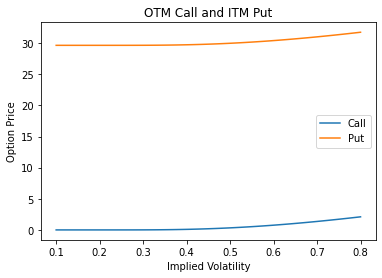

In [4]:
X = 195
d1 = (np.log(S/X) + (b + sigma**2/2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

C = S*np.exp((b-r)*T)*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)
P = X*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp((b-r)*T)*norm.cdf(-d1)

plt.plot(sigma, C, label='Call')
plt.plot(sigma, P, label='Put')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Price')
plt.title('OTM Call and ITM Put')
plt.legend()
plt.savefig('P1-b.png')
plt.show()


In the money for call, out of the money for put


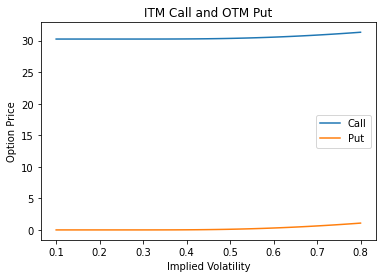

In [5]:
X = 135 
print("In the money for call, out of the money for put")
d1 = (np.log(S/X) + (b + sigma**2/2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

C = S*np.exp((b-r)*T)*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)
P = X*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp((b-r)*T)*norm.cdf(-d1)

plt.plot(sigma, C, label='Call')
plt.plot(sigma, P, label='Put')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Price')
plt.title('ITM Call and OTM Put')
plt.legend()
plt.savefig('P1-c.png')
plt.show()

## Problem 2

In [6]:
AAPL_Options = pd.read_csv('AAPL_Options.csv')

In [7]:
AAPL_Options.head()

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,12/15/2023,Call,140,30.95
1,AAPL,12/15/2023,Call,145,26.74
2,AAPL,12/15/2023,Call,150,22.80
3,AAPL,12/15/2023,Call,155,18.40
4,AAPL,12/15/2023,Call,160,14.15


In [8]:
curr_date = pd.to_datetime('2023-10-30')
AAPL_Options['T'] = (pd.to_datetime(AAPL_Options['Expiration']) - curr_date).dt.days/365

In [9]:
AAPL_Options[AAPL_Options['Type']=='Call']

,Stock,Expiration,Type,Strike,Last Price,T
0,AAPL,12/15/2023,Call,140,30.95,0.126027
1,AAPL,12/15/2023,Call,145,26.74,0.126027
2,AAPL,12/15/2023,Call,150,22.80,0.126027
3,AAPL,12/15/2023,Call,155,18.40,0.126027
4,AAPL,12/15/2023,Call,160,14.15,0.126027
5,AAPL,12/15/2023,Call,165,10.55,0.126027
6,AAPL,12/15/2023,Call,170,7.21,0.126027
7,AAPL,12/15/2023,Call,175,4.63,0.126027
8,AAPL,12/15/2023,Call,180,2.67,0.126027
9,AAPL,12/15/2023,Call,185,1.40,0.126027


In [14]:
def BS(option_type, S, X, r, b, sigma, T):
    d1 = (np.log(S/X) + (b + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == 'Call':
        return S*np.exp((b-r)*T)*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)
    else:
        return X*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp((b-r)*T)*norm.cdf(-d1)


def ImpliedVol(option_type, S, X, T, r, b, market_price, x0=0.0):
    def eq(sigma):
        return BS(option_type, S, X, r, b, sigma, T) - market_price
    return fsolve(eq, x0=x0)[0]

In [18]:
AAPL_Options[AAPL_Options["Type"]=="Call"]["Last Price"].

[30.95, 26.74, 22.8, 18.4, 14.15, 10.55, 7.21, 4.63, 2.67, 1.4, 0.69]

<ipython-input-14-435f572e878c>:2: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/X) + (b + sigma**2/2)*T) / (sigma*np.sqrt(T))


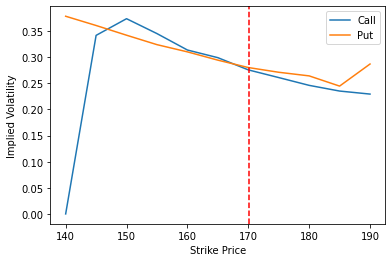

In [21]:
S = 170.15
r = 0.0525
d = 0.0057
b = r-q

call_P = AAPL_Options[AAPL_Options["Type"]=="Call"]["Last Price"].values
put_P = AAPL_Options[AAPL_Options["Type"]=="Put"]["Last Price"].values
call_X = AAPL_Options[AAPL_Options["Type"]=="Call"]["Strike"].values
put_X = AAPL_Options[AAPL_Options["Type"]=="Put"]["Strike"].values
call_T = AAPL_Options[AAPL_Options["Type"]=="Call"]["T"].values
put_T = AAPL_Options[AAPL_Options["Type"]=="Put"]["T"].values

call_IV = [ImpliedVol('Call', S, call_X[i], call_T[i], r, b, call_P[i]) for i in range(len(call_P))]
put_IV = [ImpliedVol('Pall', S, put_X[i], put_T[i], r, b, put_P[i]) for i in range(len(call_P))]

    
plt.plot(call_X, call_IV, label='Call')
plt.plot(put_X, put_IV, label='Put')
plt.axvline(x=S, color='r', linestyle='--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.savefig('P2-a.png')
plt.show()

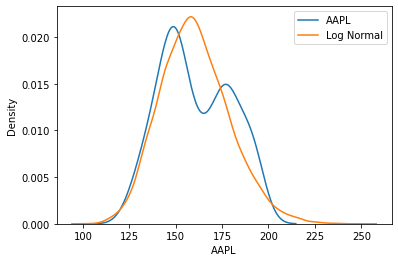

In [23]:
prices = pd.read_csv("DailyPrices.csv", index_col=0)
aapl_prices = prices['AAPL']

# Get the log of the apple prices
log_aapl_prices = np.log(aapl_prices)

# Simulate prices with log normal distribution assumption
mean = np.mean(log_aapl_prices)
std = np.std(log_aapl_prices)
np.random.seed(0)
log_normal_prices = norm(mean, std).rvs(10000)

# Plot and compare the two
plt.figure()
sns.kdeplot(aapl_prices, label='AAPL')
sns.kdeplot(np.e**log_normal_prices, label='Log Normal')
plt.legend()
plt.savefig('P2-b.png')
plt.show()

In [ ]:
# Problem 3
# Use the portfolios found in problem3.csv
# ● Current AAPL price is 170.15
# ● Current Date: 10/30/2023
# ● Risk Free Rate: 5.25%
# ● Dividend Rate: 0.57%.
# For each of the portfolios, graph the portfolio value over a range of underlying values. Plot the portfolio
# values and discuss the shapes. Bonus points available for tying these graphs to other topics discussed in
# the lecture.
# Using DailyPrices.csv. Calculate the log returns of AAPL. Demean the series so there is 0 mean. Fit an
# AR(1) model to AAPL returns. Simulate AAPL returns 10 days ahead and apply those returns to the
# current AAPL price (above). Calculate Mean, VaR and ES. Discuss.
# Hints:
# ● you will need to calculate the implied volatility - might not be the same as #2
# ● you need to take into account the change in dates for option valuations. You are simulating
# forward in time and options valuations are a function of time
# ● Calculate the PL from the current portfolio value using Current Date

In [24]:
portfolios = pd.read_csv('problem3.csv')

In [25]:
portfolios

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice
0,Straddle,Option,AAPL,1,Call,12/15/2023,170.0,7.21
1,Straddle,Option,AAPL,1,Put,12/15/2023,170.0,6.16
2,SynLong,Option,AAPL,1,Call,12/15/2023,170.0,7.21
3,SynLong,Option,AAPL,-1,Put,12/15/2023,170.0,6.16
4,CallSpread,Option,AAPL,1,Call,12/15/2023,170.0,7.21
5,CallSpread,Option,AAPL,-1,Call,12/15/2023,180.0,2.67
6,PutSpread,Option,AAPL,1,Put,12/15/2023,170.0,6.16
7,PutSpread,Option,AAPL,-1,Put,12/15/2023,160.0,2.99
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,170.15
9,Call,Option,AAPL,1,Call,12/15/2023,170.0,7.21


In [26]:
S = 170.15
r = 0.0525
q = 0.0057
b = r-q
curr_date = pd.to_datetime('2023-10-30')
exp = pd.to_datetime('2023-12-15')
T = (exp - curr_date).days/365
price = np.linspace(120,220,100)

def option_price(option_type, S, X):
    return np.maximum(S-X, 0) if option_type=="Call" else np.maximum(X-S, 0)

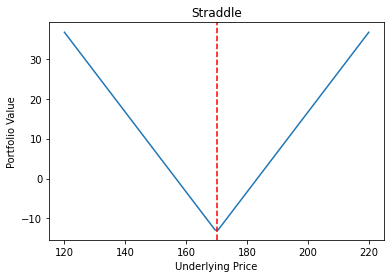

In [27]:
# Straddle
df = portfolios[portfolios['Portfolio']=='Straddle']
payoff = option_price("Call", price, df['Strike'].values[0]) + option_price("Put", price, df['Strike'].values[0]) - df['CurrentPrice'].values[1] - df['CurrentPrice'].values[0]
plt.plot(price, payoff)
plt.title('Straddle')
plt.axvline(x=S, color='r', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-a.png')
plt.show()

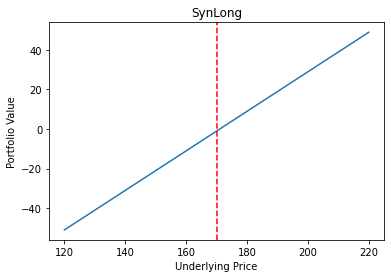

In [28]:
# SynLong
df = portfolios[portfolios['Portfolio']=='SynLong']
payoff = df[df['OptionType']=='Call']['Holding'].values[0]*option_price("Call", price, df['Strike'].values[0]) + df[df['OptionType']=='Put']['Holding'].values[0]*option_price("Put", price, df['Strike'].values[0]) + df['CurrentPrice'].values[1] - df['CurrentPrice'].values[0]
plt.plot(price, payoff)
plt.axvline(x=S, color='r', linestyle='--')
plt.title('SynLong')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-b.png')
plt.show()

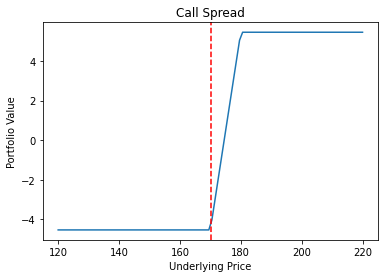

In [30]:
# CallSpread
df = portfolios[portfolios['Portfolio']=='CallSpread']
payoff = df[df['OptionType']=='Call']['Holding'].values[0]*option_price("Call", price, df['Strike'].values[0]) + df[df['OptionType']=='Call']['Holding'].values[1]*option_price("Call", price, df['Strike'].values[1]) + df['CurrentPrice'].values[1] - df['CurrentPrice'].values[0]
plt.plot(price, payoff)
plt.axvline(x=S, color='r', linestyle='--')
plt.title('Call Spread')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-c.png')
plt.show()

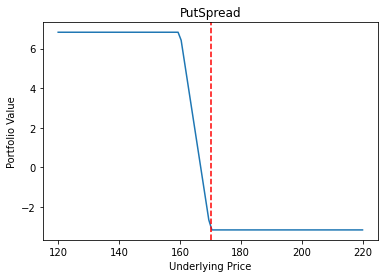

In [31]:
# PutSpread
df = portfolios[portfolios['Portfolio']=='PutSpread']
payoff = df[df['OptionType']=='Put']['Holding'].values[1]*option_price("Put", price, df['Strike'].values[1]) + df[df['OptionType']=='Put']['Holding'].values[0]*option_price("Put", price, df['Strike'].values[0]) + df['CurrentPrice'].values[1] - df['CurrentPrice'].values[0]
plt.plot(price, payoff)
plt.axvline(x=S, color='r', linestyle='--')
plt.title('PutSpread')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-d.png')
plt.show()

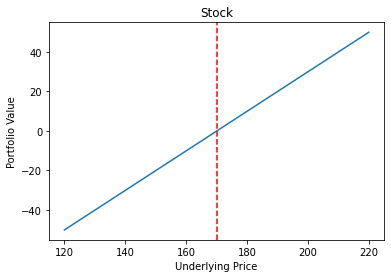

In [32]:
# Stock
df = portfolios[portfolios['Portfolio']=='Stock']
payoff = df['Holding'].values[0]*price - S
plt.plot(price, payoff)
plt.axvline(x=S, color='r', linestyle='--')
plt.title('Stock')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-e.png')
plt.show()

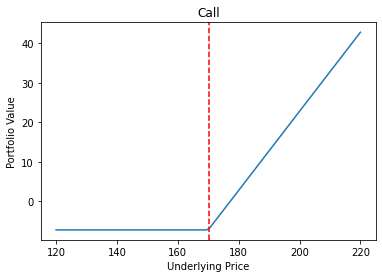

In [33]:
# Call 
df = portfolios[portfolios['Portfolio']== 'Call ']
payoff = option_price("Call", price, df['Strike'].values[0]) - df['CurrentPrice'].values[0]
plt.plot(price, payoff)
plt.title('Call')
plt.axvline(x=S, color='r', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-f.png')
plt.show()

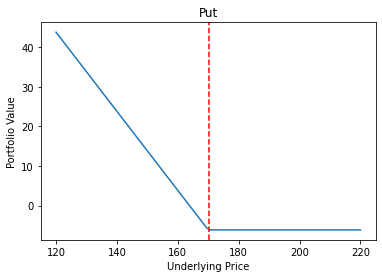

In [34]:
# Put
df = portfolios[portfolios['Portfolio']=='Put ']
payoff = option_price("Put", price, df['Strike'].values[0]) - df['CurrentPrice'].values[0]
plt.plot(price, payoff)
plt.title('Put')
plt.axvline(x=S, color='r', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-g.png')
plt.show()

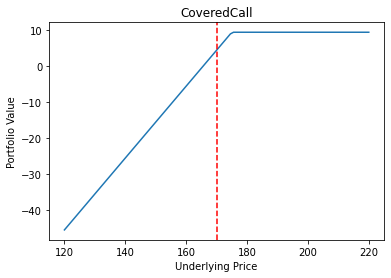

In [35]:
# CoveredCall
df = portfolios[portfolios['Portfolio']=='CoveredCall']
payoff = df['CurrentPrice'].values[1] - np.maximum(price - df['Strike'].values[1], 0) + price - S
plt.plot(price, payoff)
plt.title('CoveredCall')
plt.axvline(x=S, color='r', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-h.png')
plt.show()

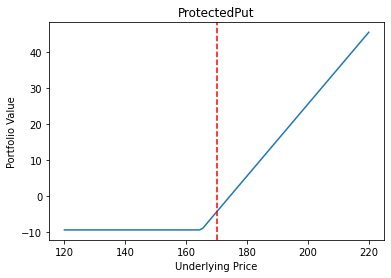

In [37]:
# ProtectedPut
df = portfolios[portfolios['Portfolio']=='ProtectedPut']
payoff = df[df['OptionType']=='Put']['Holding'].values[0]*option_price("Put", price, df['Strike'].values[1]) - df['CurrentPrice'].values[1] + df['Holding'].values[0]*price - S
plt.plot(price, payoff)
plt.title('ProtectedPut')
plt.axvline(x=S, color='r', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Portfolio Value')
plt.savefig('P3-i.png')
plt.show()

In [38]:
aapl = prices['AAPL']
aapl_return = rml.calculateReturn(aapl, 'log')
aapl_return = aapl_return - aapl_return.mean()

In [39]:
#fitting AR(1) model
model = ARIMA(aapl_return, order=(1,0,0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 689.298
Date:                Fri, 03 Nov 2023   AIC                          -1372.597
Time:                        15:06:17   BIC                          -1361.858
Sample:                             0   HQIC                         -1368.282
                                - 265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.012e-06      0.001     -0.002      0.999      -0.002       0.002
ar.L1         -0.0076      0.054     -0.140      0.888      -0.114       0.099
sigma2         0.0003   1.98e-05     16.272      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                91.53
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
n = 10000
sigma = np.sqrt(res.params[2])
normal = np.random.normal(0, sigma, size = (10,n))
sim_prices = S * (1+normal).prod(axis=0)

In [51]:
portfolios['CurrentValue'] = portfolios['Holding']*portfolios['CurrentPrice']
current_value = portfolios.groupby('Portfolio')['CurrentValue'].sum()

In [83]:
current_values = pd.DataFrame(index = current_value.index, data = current_value.values).T

In [86]:
current_values.columns = list(current_value.index)

In [44]:
# Calculate the implied volatility
implied_vol = []
for i in range(portfolios.shape[0]):
    option_type = portfolios['OptionType'][i]
    if isinstance(option_type, float):
        implied_vol.append(np.nan)
    else:
        S = 170.15
        X = float(portfolios['Strike'][i])
        T = (pd.to_datetime(portfolios['ExpirationDate'][i]) - pd.to_datetime('2023-10-30')).days/365
        r = 0.0525
        q = 0.0057
        b = r-q
        market_price = float(portfolios['CurrentPrice'][i])
        implied_vol.append(ImpliedVol(option_type.lower(), S, X, T, r, b, market_price, x0=0.5))
portfolios['IV'] = implied_vol

/Users/fanlingrui/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [46]:
days_ahead = 10
sim_value = pd.DataFrame(index = portfolios.index, columns = list(range(len(sim_prices))))
    
for i in range(portfolios.shape[0]):
        
    if portfolios['Type'][i] == 'Stock':
        final_value = sim_prices
    else:
        option_type = portfolios['OptionType'][i].lower()
        S = sim_prices
        X = float(portfolios['Strike'][i])
        T = ((pd.to_datetime(portfolios['ExpirationDate'][i]) - pd.to_datetime('2023-10-30')).days - days_ahead)/365
        r = 0.0525
        q = 0.0057
        b = r-q
        sigma = float(portfolios['IV'][i])
        final_value = BS(option_type, S, X, r, b, sigma, T)
            
    sim_value.loc[i, :] = portfolios["Holding"][i] * final_value
        
sim_value['Portfolio'] = portfolios['Portfolio']
    
# return sim_value.groupby('Portfolio').sum()

In [58]:
indices = list(np.linspace(0, len(portfolios['Portfolio'].unique())-1, len(portfolios['Portfolio'].unique())))

In [59]:
indices = list(map(int, indices))

In [60]:
sim_results = pd.DataFrame(index = indices, columns = list(range(len(sim_prices))))
port_names = sim_value['Portfolio'].unique()
for i in range(len(port_names)):
    sim_results.loc[i, :] = sim_value[sim_value['Portfolio'] == port_names[i]].sum()

In [61]:
sim_results['Portfolio'] = portfolios['Portfolio'].unique()

In [63]:
sim_results.index = sim_results['Portfolio']

In [ ]:
sim_results = sim_results.loc[:, sim_results.columns != 'Portfolio']

In [93]:
cols = list(sim_results.index)

In [95]:
sim_results = sim_results.T
sim_results.columns = cols

In [108]:
sim_results['Straddle'].values

array([5.929570810923302, 25.57506362627136, 14.90510938994312, ...,
       1.2448144024497267, 8.064754492515334, 25.2747598699072],
      dtype=object)

In [104]:
current_values['Call '].values[0]

7.21

In [101]:
sim_result_difference = pd.DataFrame(index = current_value.index, columns = list(range(len(sim_prices)))).T
sim_result_difference.columns = cols

In [111]:
for port in sim_result_difference.columns:
    sim_vals = sim_results[port].values
    sim_result_difference[port] = sim_vals - current_values[port].values[0]

In [112]:
sim_result_difference

,Straddle,SynLong,CallSpread,PutSpread,Stock,Call,Put,CoveredCall,ProtectedPut
0,-7.440429,-0.235027,-1.149429,-1.594166,8.305651,-3.837728,-3.602701,12.376543,5.577631
1,12.205064,-0.333132,8.605966,2.827527,-11.398853,5.935966,6.269098,-22.20385,-6.629978
2,1.535109,-0.134375,3.370367,0.662627,-3.014542,0.700367,0.834742,-5.600552,-2.569948
3,6.172744,-0.202871,5.654936,1.674722,-6.992342,2.984936,3.187808,-13.410808,-4.726514
4,6.118201,-0.201849,5.628176,1.663455,-6.949175,2.958176,3.160025,-13.324999,-4.70533
...,...,...,...,...,...,...,...,...,...
9995,-0.652325,-0.120562,2.283556,0.147593,-0.852603,-0.386444,-0.265881,-1.527868,-1.229685
9996,-3.882629,-0.136033,0.660669,-0.655645,2.877026,-2.009331,-1.873298,4.889687,1.338782
9997,-12.125186,-0.68507,10.594748,-2.875115,23.358989,-6.405128,-5.720058,27.988839,19.289274
9998,-5.305246,-0.162319,-0.063782,-1.02467,4.821614,-2.733782,-2.571463,7.825278,2.794944


In [116]:
sim_result_difference.mean(axis=0)

Straddle        0.552506
SynLong        -0.250180
CallSpread      3.790313
PutSpread       0.234849
Stock           0.095414
Call            0.151163
Put             0.401343
CoveredCall    -1.860412
ProtectedPut    0.378989
dtype: float64

In [118]:
sim_result_difference.apply(lambda x:rml.calculateVar(x), axis=0)

Straddle        10.697175
SynLong          0.577707
CallSpread       1.008630
PutSpread        2.487403
Stock           15.273265
Call             5.586934
Put              5.110241
CoveredCall     29.949773
ProtectedPut     7.891118
dtype: float64

In [119]:
sim_result_difference.apply(lambda x:rml.calculateES(x), axis=0)

Straddle        11.580706
SynLong          0.690100
CallSpread       1.131866
PutSpread        2.726893
Stock           18.795021
Call             6.093218
Put              5.487488
CoveredCall     36.991291
ProtectedPut     8.643038
dtype: float64